## Draw plots needed for the paper

In [1]:
# Import required libraries
%load_ext autoreload
%autoreload 2

import pandas as pd
from plotUtils import PlotUtils
import numpy as np

In [2]:
datasetToName = {"ddg": "DuckDuckGo", "bing": "Bing", "google": "Google"}
modelToName = {"resnet": "ResNet", "alexnet": "AlexNet", "vgg": "VGG"}
balanceToName = {"20/80": "Strong", "30/70": "Medium",
                 "40/60": "Weak", "50/50": "Original"}


## Plot utilities

In [3]:
TITLE_PAD = 30
TITLE_DIM = 30
XY_LABEL_PAD = 23
XY_LABEL_DIM = 28
XY_TICKS_DIM = 28
GRID_ALPHA = 0.2
FILL_ALPHA = 0.05
BAR_WIDTH = 0.5
LEGEND_LOC = "upper left"
LEGEND_LABEL_DIM = 25
COLOR_SCHEME = ["#91C483", "#FF6464", "#FFE162", "#C67ACE"]

FIG_SIZE = (18, 8)
FIG_BG_COLOR = None # "w"
FIG_DPI = 500
FIG_BBOX = "tight"
FIG_PAD = .3
FIG_FORMATS = ["png", "pdf"]

In [4]:
plotter = PlotUtils(
    options={
        "titlePad": TITLE_PAD,
        "titleDim": TITLE_DIM,
        "xyLabelPad": XY_LABEL_PAD,
        "xyLabelDim": XY_LABEL_DIM,
        "xyTicksDim": XY_TICKS_DIM,
        "gridAlpha": GRID_ALPHA,
        "fillAlpha": FILL_ALPHA,
        "barWidth": BAR_WIDTH,
        "legendLoc": LEGEND_LOC,
        "legendLabelDim": LEGEND_LABEL_DIM,
        "colorScheme": COLOR_SCHEME,
        "figSize": FIG_SIZE,
        "figBGColor": FIG_BG_COLOR,
        "figDPI": FIG_DPI,
        "figBBox": FIG_BBOX,
        "figPad": FIG_PAD,
        "figFormats": FIG_FORMATS,
    }
)

## Load data

In [5]:
allModelsEvaluationsDF = pd.read_csv(
    "../results/modelsEvaluations.csv", sep=",", index_col=0)

## Transferabilty

In [6]:
modelsNoAttackEvaluationsDF = allModelsEvaluationsDF[pd.notna(allModelsEvaluationsDF["attack"]) == False]
modelsNoAttackEvaluationsDF

,dataset,isMath,attack,advModel,advBalancing,model,modelDataset,balancing,acc,precision,recall,f1
0,bing,NaN,NaN,NaN,NaN,alexnet,bing,20/80,0.9230,0.879032,0.981,0.927221
1,bing,NaN,NaN,NaN,NaN,alexnet,bing,30/70,0.9400,0.928850,0.953,0.940770
2,bing,NaN,NaN,NaN,NaN,alexnet,bing,40/60,0.9460,0.957906,0.933,0.945289
3,bing,NaN,NaN,NaN,NaN,alexnet,bing,50/50,0.9485,0.941872,0.956,0.948883
4,bing,NaN,NaN,NaN,NaN,resnet,bing,20/80,0.9545,0.922791,0.992,0.956145
...,...,...,...,...,...,...,...,...,...,...,...,...
103,google,NaN,NaN,NaN,NaN,resnet,google,50/50,0.9805,0.979063,0.982,0.980529
104,google,NaN,NaN,NaN,NaN,vgg,google,20/80,0.9720,0.953846,0.992,0.972549
105,google,NaN,NaN,NaN,NaN,vgg,google,30/70,0.9750,0.962062,0.989,0.975345
106,google,NaN,NaN,NaN,NaN,vgg,google,40/60,0.9830,0.981076,0.985,0.983034


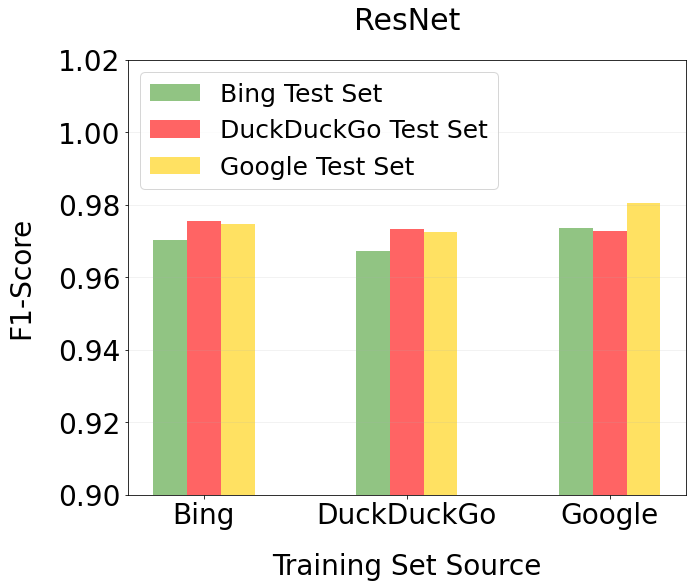

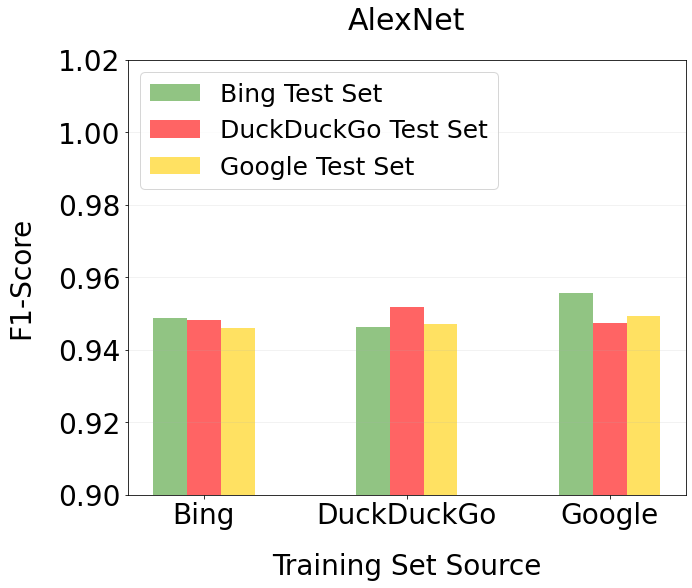

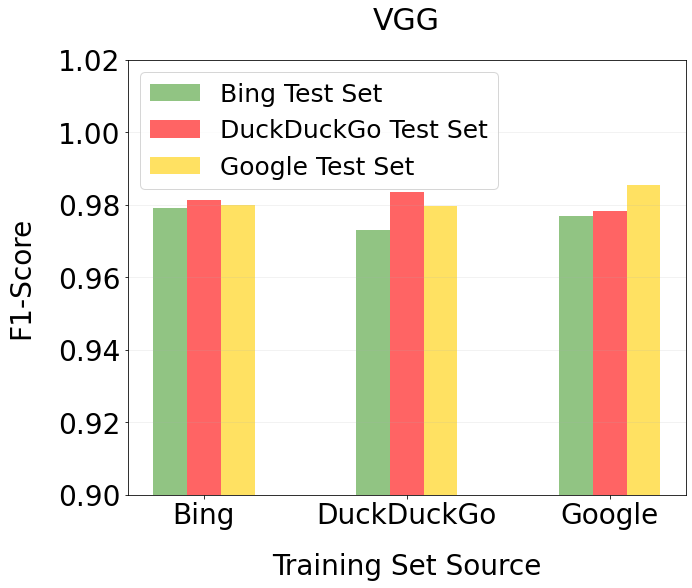

In [7]:
for model in ["resnet", "alexnet", "vgg"]:
    modelsDF = modelsNoAttackEvaluationsDF[modelsNoAttackEvaluationsDF["model"] == model]
    modelsDF = modelsDF[modelsDF["balancing"] == "50/50"]
    datasetDF = modelsDF.groupby(["modelDataset", "dataset"]).mean()
    modelDatasetDF = datasetDF.groupby("dataset")["f1"].apply(list)

    plotter.plotResults(
        figSize=(10, 8),
        x=np.arange(len(modelDatasetDF)),
        yArr=list(modelDatasetDF),
        yLabel="F1-Score",
        xLabel="Training Set Source",
        legend=["Bing Test Set", "DuckDuckGo Test Set", "Google Test Set"],
        xTicks=[datasetToName[x] for x in modelDatasetDF.index],
        showGrid=True,
        gridAxis="y",
        style="bar",
        saveTitle=model + "All",
        yLim=[0.90, 1.02],
        title=modelToName[model]
    )

## Evaluations

In [18]:
modelsAttackEvaluationsDF = allModelsEvaluationsDF.dropna(subset=["isMath"])

# Remove Sharpen
modelsAttackEvaluationsDF = modelsAttackEvaluationsDF[modelsAttackEvaluationsDF["attack"] != "Sharpen"]

# Add informations to the CSV
modelsAttackEvaluationsDF["asr"] = modelsAttackEvaluationsDF.apply(lambda row: 1 - row["acc"], axis=1)
modelsAttackEvaluationsDF["sameDataset"] = modelsAttackEvaluationsDF.apply(lambda row: row["dataset"] == row["modelDataset"], axis=1)
modelsAttackEvaluationsDF["sameModel"] = modelsAttackEvaluationsDF.apply(lambda row: row["advModel"] == row["model"], axis=1)
modelsAttackEvaluationsDF["sameBalancing"] = modelsAttackEvaluationsDF.apply(lambda row: row["advBalancing"] == row["balancing"], axis=1)

In [19]:
modelsAttackEvaluationsDF

,dataset,isMath,attack,advModel,advBalancing,model,modelDataset,balancing,acc,precision,recall,f1,asr,sameDataset,sameModel,sameBalancing
108,bing,False,BoxBlur,NaN,NaN,alexnet,bing,20/80,0.9325,0.917874,0.950,0.933661,0.0675,True,False,False
109,bing,False,BoxBlur,NaN,NaN,alexnet,bing,30/70,0.9305,0.935288,0.925,0.930116,0.0695,True,False,False
110,bing,False,BoxBlur,NaN,NaN,alexnet,bing,40/60,0.9390,0.963080,0.913,0.937372,0.0610,True,False,False
111,bing,False,BoxBlur,NaN,NaN,alexnet,bing,50/50,0.9380,0.943320,0.932,0.937626,0.0620,True,False,False
112,bing,False,BoxBlur,NaN,NaN,resnet,bing,20/80,0.9535,0.927427,0.984,0.954876,0.0465,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447,google,True,FGSM,vgg,50/50,resnet,google,50/50,0.9050,0.955056,0.850,0.899471,0.0950,True,False,True
7448,google,True,FGSM,vgg,50/50,vgg,google,20/80,0.7000,0.688679,0.730,0.708738,0.3000,True,True,False
7449,google,True,FGSM,vgg,50/50,vgg,google,30/70,0.7400,0.755319,0.710,0.731959,0.2600,True,True,False
7450,google,True,FGSM,vgg,50/50,vgg,google,40/60,0.7050,0.735632,0.640,0.684492,0.2950,True,True,False


## Where attacks performs better

In [20]:
goodResultsDF = modelsAttackEvaluationsDF[modelsAttackEvaluationsDF["asr"] >= 0.2]

groupBy = ["isMath", "sameDataset", "sameModel", "sameBalancing"]

goodResultsDF = goodResultsDF.groupby(groupBy).count()

groupBy.extend(["f1"])
goodResultsDF = goodResultsDF.drop(
    goodResultsDF.columns.difference(groupBy), axis=1)
goodResultsDF = goodResultsDF.rename(columns={"f1": "# of asr >= 0.2"})

goodResultsDF


# of asr >= 0.2
isMath sameDataset sameModel sameBalancing                 
False  False       False     False                      122
       True        False     False                       61
True   False       False     False                      128
                             True                        44
                   True      False                      403
                             True                       134
       True        False     False                       68
                             True                        23
                   True      False                      210
                             True                        72

### RQ1

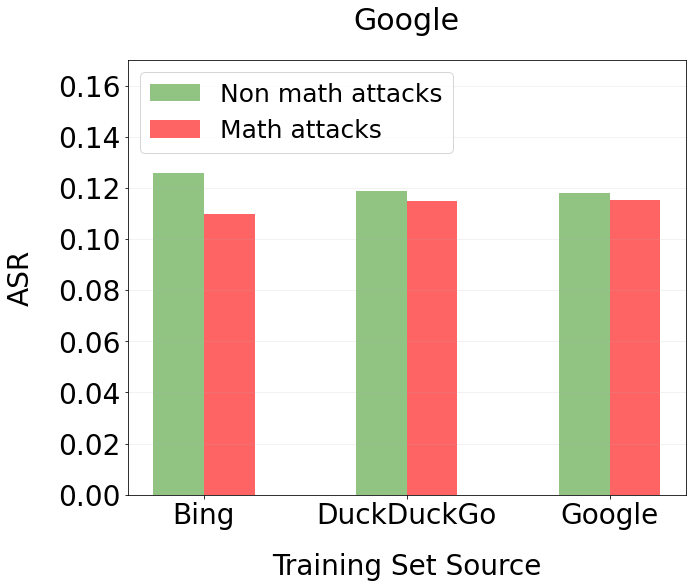

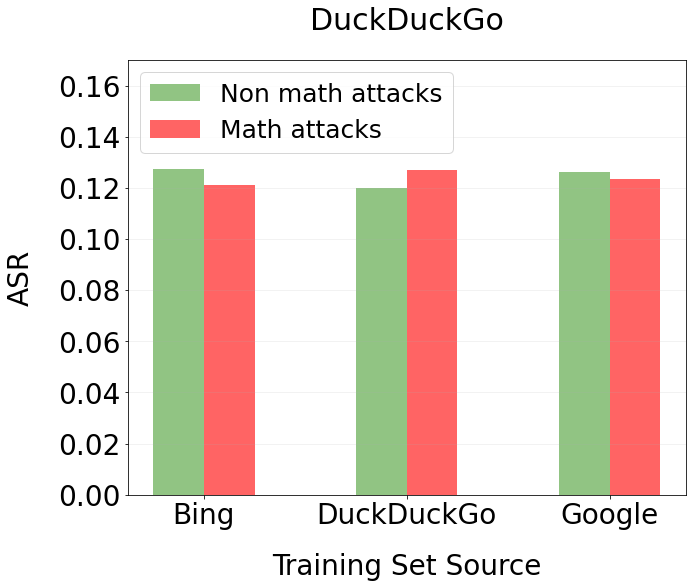

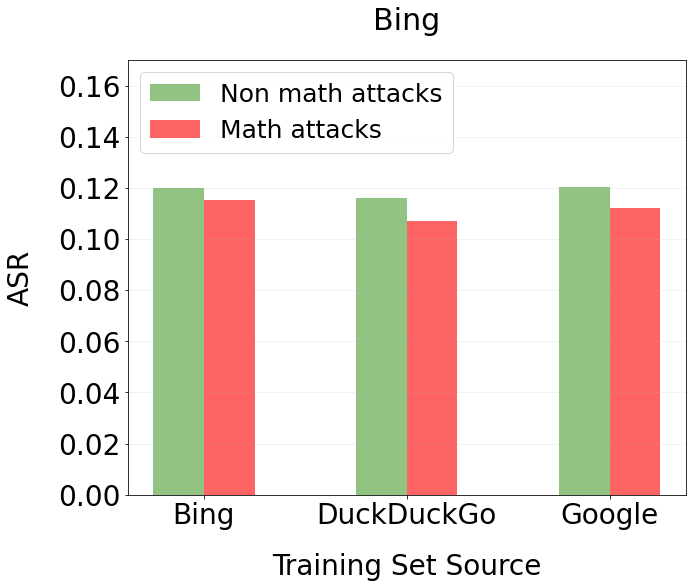

In [11]:
for dataset in ["google", "ddg", "bing"]:
    datasetDF = modelsAttackEvaluationsDF[modelsAttackEvaluationsDF["dataset"] == dataset]
    mathMeanDF = datasetDF.groupby(["isMath", "modelDataset"]).mean()
    mathMeanVals = mathMeanDF.groupby("isMath")["asr"].apply(list)
    dsValues = mathMeanDF.groupby(["modelDataset"]).mean().index

    plotter.plotResults(
        figSize=(10, 8),
        x=np.arange(len(dsValues)),
        yArr=list(mathMeanVals),
        yLabel="ASR",
        xLabel="Training Set Source",
        legend=["Non math attacks", "Math attacks"],
        xTicks=[datasetToName[x] for x in dsValues],
        showGrid=True,
        gridAxis="y",
        style="bar",
        yLim=[0, 0.17],
        saveTitle="rq1_" + dataset,
        title=datasetToName[dataset]
    )

RQ1 VARIANT

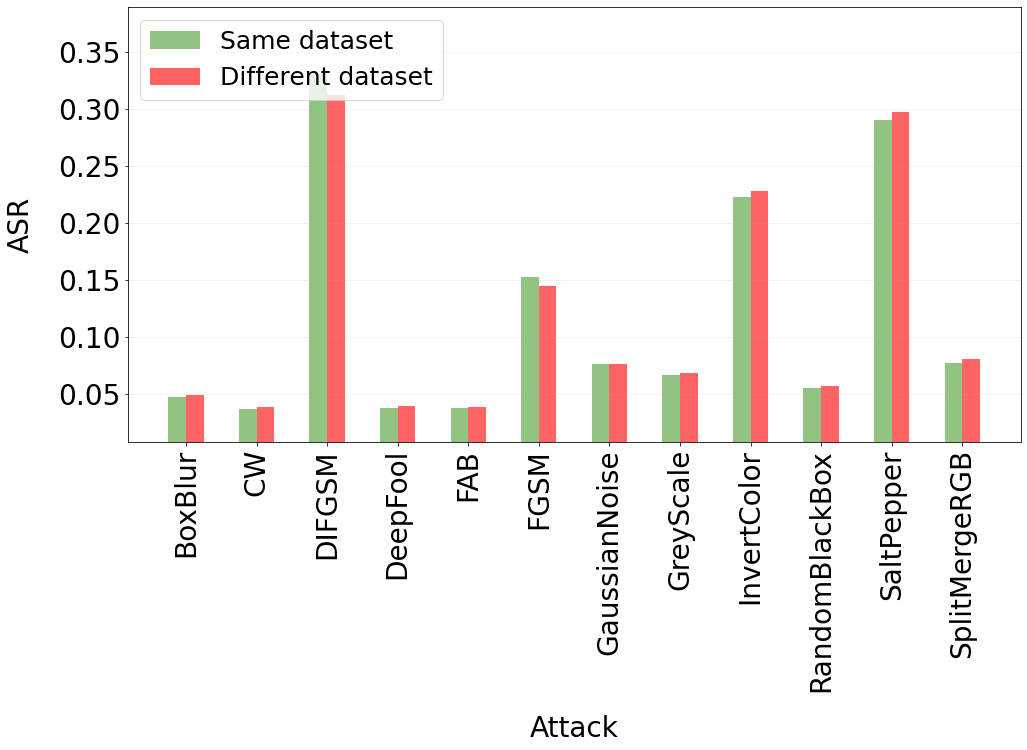

In [12]:
sameDatasetDF = modelsAttackEvaluationsDF.groupby(["sameDataset","attack"]).mean()
attacksValues = sameDatasetDF.groupby(["sameDataset"])["asr"].apply(list)
attacksNames = list(sameDatasetDF.groupby(["attack"]).mean().index)

plotter.plotResults(
    figSize=(16, 8),
    x=np.arange(len(attacksNames)),
    yArr=list(reversed(list(attacksValues))),
    yLabel="ASR",
    xLabel="Attack",
    legend=["Same dataset", "Different dataset"],
    xTicks=attacksNames,
    xTicksRotation=90,
    showGrid=True,
    gridAxis="y",
    style="bar",
    saveTitle="rq1_variant"
)

### RQ2

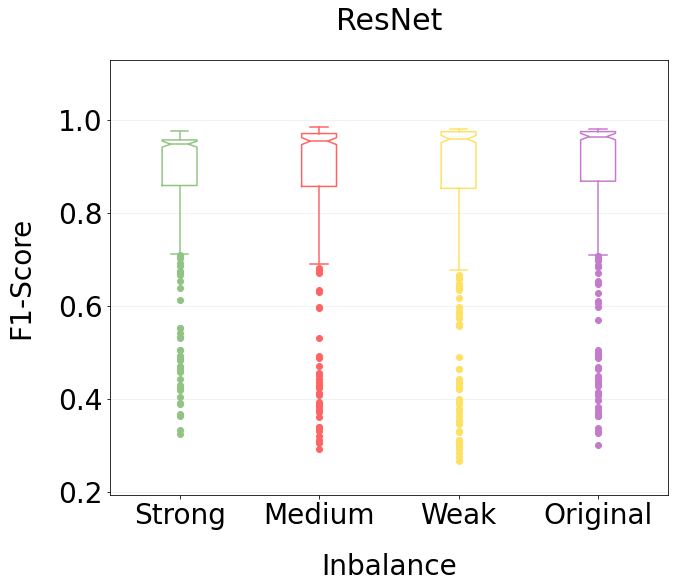

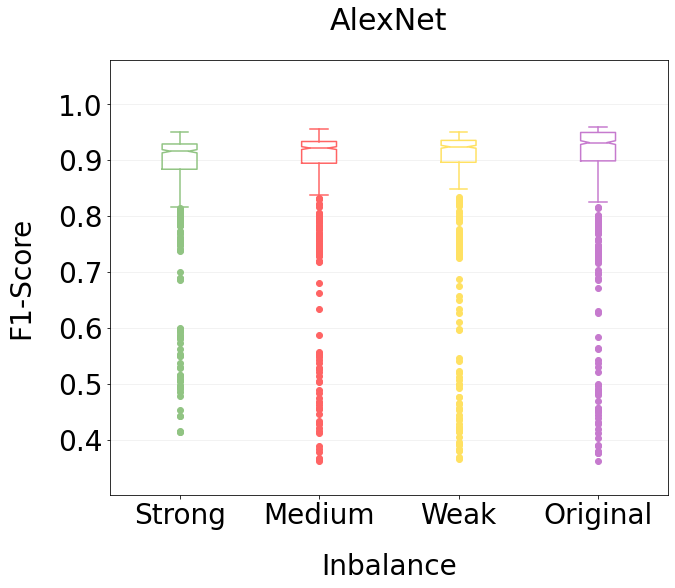

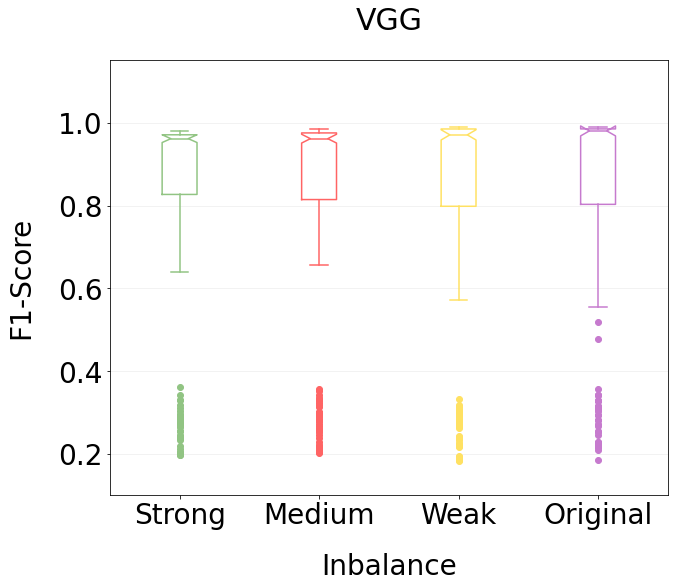

In [13]:
for model in ["resnet", "alexnet", "vgg"]:
    modelDF = modelsAttackEvaluationsDF[modelsAttackEvaluationsDF["model"] == model]
    modelGroupedDF = modelDF.groupby(["balancing"])["f1"]
    bottomQuantileDF = modelGroupedDF.quantile(0)
    topQuantileDF = modelGroupedDF.quantile(1)

    listValues = modelGroupedDF.apply(list)
    filteredValues = []
    for vals, bottomQuantile, topQuantile in zip(listValues, bottomQuantileDF, topQuantileDF):
        valsNP = np.array(vals)
        valsNP = valsNP[(valsNP > bottomQuantile) & (valsNP < topQuantile)]

        filteredValues.append(list(valsNP))

    plotter.plotResults(
        figSize=(10, 8),
        x=np.arange(len(listValues)),
        yArr=filteredValues,
        yLabel="F1-Score",
        xLabel="Inbalance",
        xTicks=[balanceToName[x] for x in listValues.index],
        showGrid=True,
        gridAxis="y",
        style="boxplot",
        saveTitle="rq2_" + model,
        title=modelToName[model]
    )

#### RQ2 ErrorPlot

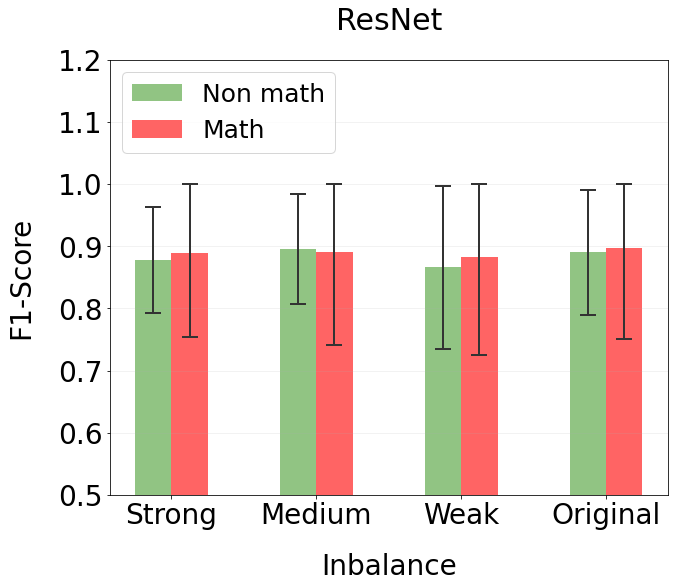

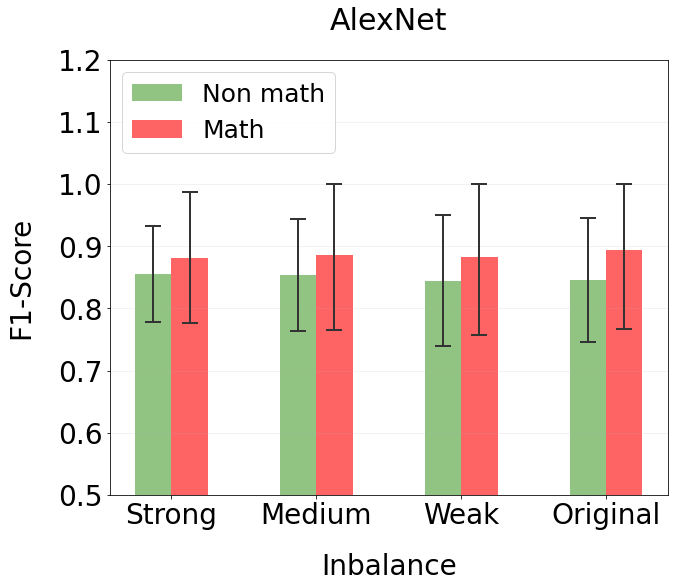

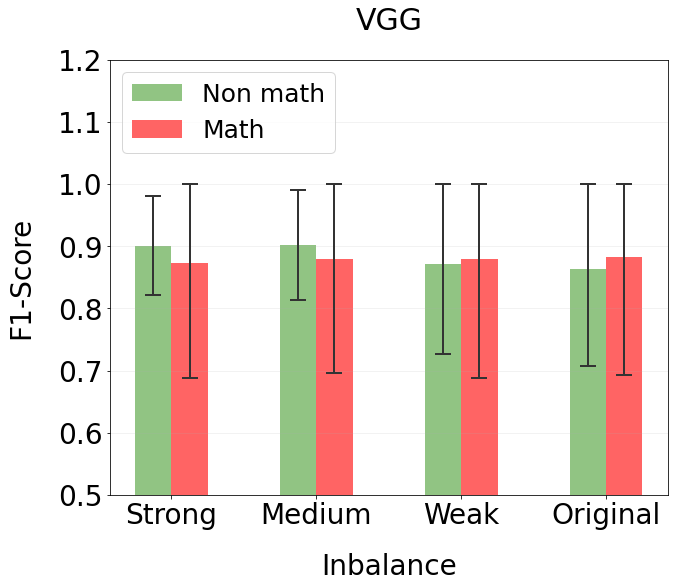

In [14]:
for model in ["resnet", "alexnet", "vgg"]:
    modelDF = modelsAttackEvaluationsDF[modelsAttackEvaluationsDF["model"] == model]

    modelGroupedMeanDF = modelDF.groupby(["isMath", "balancing"]).mean()["f1"]
    modelGroupedMeanValues = modelGroupedMeanDF.groupby(["isMath"]).apply(list)
    
    modelGroupedStdDF = modelDF.groupby(["isMath", "balancing"]).std()["f1"]
    modelGroupedStdValues = modelGroupedStdDF.groupby(["isMath"]).apply(list)

    xTicks = modelGroupedMeanDF.groupby(["balancing"]).mean().index

    stdValues = []
    for stdAr, meanAr in zip(modelGroupedStdValues, modelGroupedMeanValues):
        stdValues.append([stdAr, [min(1 - x, y) for x, y in zip(meanAr, stdAr)]])

    plotter.plotResults(
        figSize=(10, 8),
        x=np.arange(len(xTicks)),
        yArr=list(modelGroupedMeanValues),
        yErrors=stdValues,
        yLabel="F1-Score",
        xLabel="Inbalance",
        xTicks=[balanceToName[x] for x in xTicks],
        legend=["Non math", "Math"],
        showGrid=True,
        gridAxis="y",
        style="bar",
        yLim=[0.5, 1.2],
        saveTitle="rq2_errorplot_" + model,
        title=modelToName[model]
    )

#### RQ2 Variant

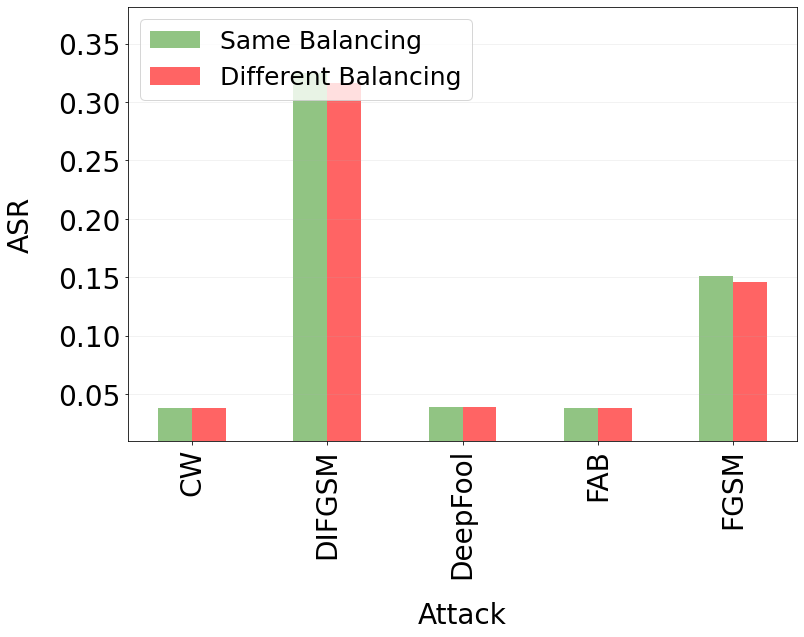

In [21]:
mathDF = modelsAttackEvaluationsDF[modelsAttackEvaluationsDF["isMath"] == True]
sameBalancingDF = mathDF.groupby(["sameBalancing", "attack"]).mean()
attacksValues = sameBalancingDF.groupby(["sameBalancing"])["asr"].apply(list)
attacksNames = list(sameBalancingDF.groupby(["attack"]).mean().index)

plotter.plotResults(
    figSize=(12, 8),
    x=np.arange(len(attacksNames)),
    yArr=list(reversed(list(attacksValues))),
    yLabel="ASR",
    xLabel="Attack",
    legend=["Same Balancing", "Different Balancing"],
    xTicks=attacksNames,
    xTicksRotation=90,
    showGrid=True,
    gridAxis="y",
    style="bar",
    saveTitle="rq2_variant",
)


### RQ3

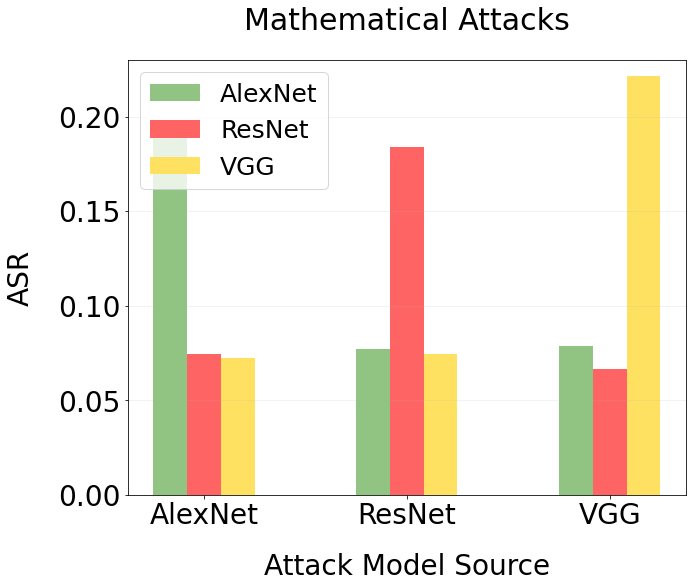

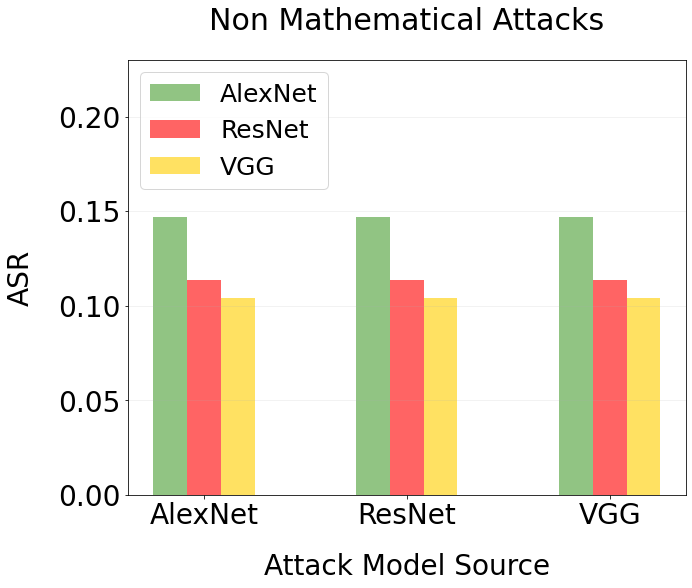

In [15]:
for isMath in [True, False]:  
    datasetDF = modelsAttackEvaluationsDF[modelsAttackEvaluationsDF["isMath"] == isMath]

    groupBy = ["model", "advModel"] if isMath else ["model"]
    modelsDF = datasetDF.groupby(groupBy).mean()
    advModels = modelsDF.groupby(["model"])["asr"].apply(list)

    if isMath:
        graph_title = "Mathematical Attacks"
        file_title = "math"
    else:
        graph_title = "Non Mathematical Attacks"
        file_title = "nonmath"

    plotter.plotResults(
        figSize=(10, 8),
        x=np.arange(3),
        yArr=list(advModels),
        yLabel="ASR",
        xLabel="Attack Model Source",
        legend=[modelToName[x] for x in list(advModels.index)],
        xTicks=[modelToName[x] for x in list(advModels.index)],
        showGrid=True,
        gridAxis="y",
        style="bar",
        yLim=[0, 0.23],
        saveTitle="rq3_" + file_title,
        title=graph_title
    )

#### RQ3 Variant

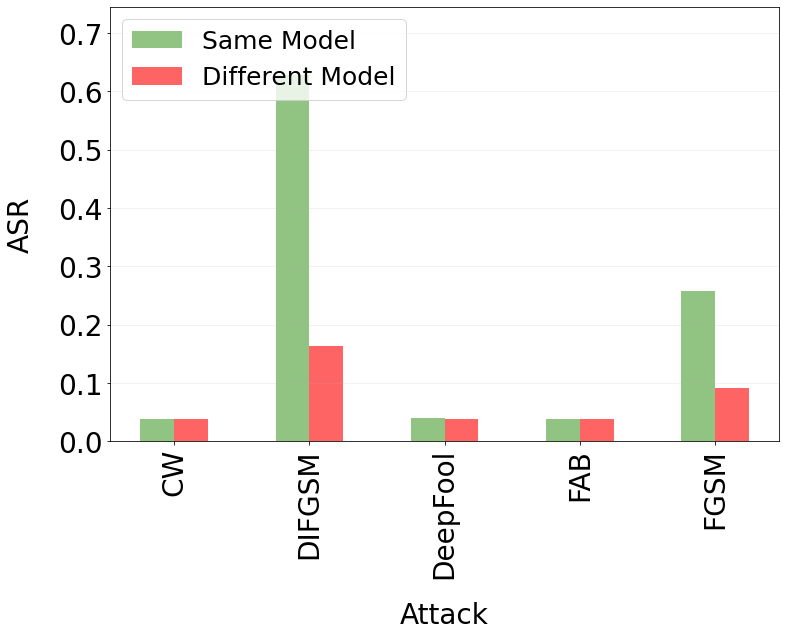

In [16]:
mathDF = modelsAttackEvaluationsDF[modelsAttackEvaluationsDF["isMath"] == True]
sameModelDF = mathDF.groupby(["sameModel", "attack"]).mean()
attacksValues = sameModelDF.groupby(["sameModel"])["asr"].apply(list)
attacksNames = list(sameModelDF.groupby(["attack"]).mean().index)

plotter.plotResults(
    figSize=(12, 8),
    x=np.arange(len(attacksNames)),
    yArr=list(reversed(list(attacksValues))),
    yLabel="ASR",
    xLabel="Attack",
    legend=["Same Model", "Different Model"],
    xTicks=attacksNames,
    xTicksRotation=90,
    showGrid=True,
    gridAxis="y",
    style="bar",
    #yLim=[0, 0.8],
    saveTitle="rq3_variant",
)

### RQ4

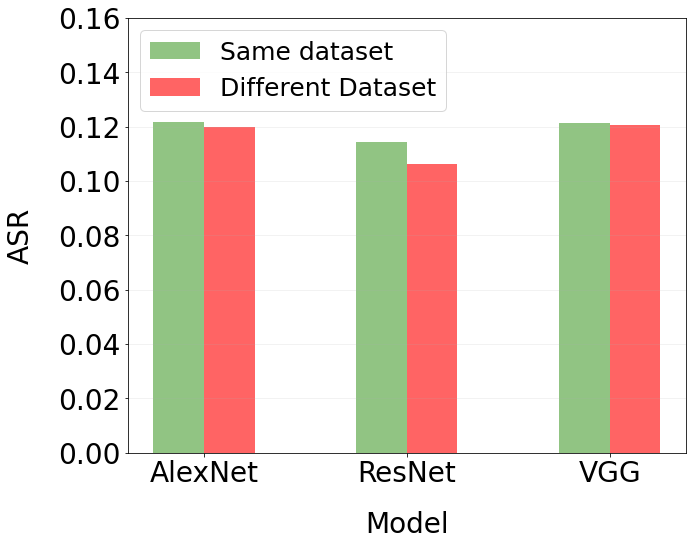

In [17]:
sameDatasetDF = modelsAttackEvaluationsDF.groupby(["sameDataset", "model"]).mean()
modelsValues = sameDatasetDF.groupby(["sameDataset"])["asr"].apply(list)
modelsNames = list(sameDatasetDF.groupby(["model"]).mean().index)

plotter.plotResults(
    figSize=(10, 8),
    x=np.arange(len(modelsNames)),
    yArr=list(reversed(list(modelsValues))),
    yLabel="ASR",
    xLabel="Model",
    legend=["Same dataset", "Different Dataset"],
    xTicks=[modelToName[x] for x in modelsNames],
    showGrid=True,
    gridAxis="y",
    style="bar",
    yLim=[0, 0.16],
    saveTitle="rq4"
)